# Beta-Binomial Model of Galaxy Morphological Type Frequencies
Group Members: Abby Stokes, Elliot(t)! Tanner, Lexi Leali, Walter Sands


## 1. Importing Packages and Reading in the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import beta, binom

In [2]:
df=pd.read_table("GalaxyMorphZ.tsv") #Replace with local file path
dat = pd.DataFrame(df)
print(dat.head())
print(dat.describe())

                 objID         z  SVMPython  RFPython
0  1237657190905217072  0.078133          0         0
1  1237657191978959105  0.082131          0         0
2  1237652944249094158  0.083400          0         0
3  1237656496724312079  0.020017          1         1
4  1237657191978959113  0.082439          0         0
              objID              z      SVMPython       RFPython
count  3.160310e+05  316031.000000  316031.000000  316031.000000
mean   1.237662e+18       0.063504       0.558053       0.581721
std    6.022167e+12       0.023058       0.496619       0.493277
min    1.237646e+18       0.003001       0.000000       0.000000
25%    1.237658e+18       0.045979       0.000000       0.000000
50%    1.237662e+18       0.067202       1.000000       1.000000
75%    1.237665e+18       0.082217       1.000000       1.000000
max    1.237680e+18       0.100000       1.000000       1.000000


## 2. Visual Inspection of Data

Number of late-type SVM:  176362
Number of late-type RF:  183842
Number of early-type SVM:  139669
Number of early-type RF:  132189
Percent of late-type SVM:  0.5580528492458018
Percent of late-type RF:  0.5817214134056469
Percent of early-type SVM:  0.44194715075419816
Percent of early-type RF:  0.4182785865943531


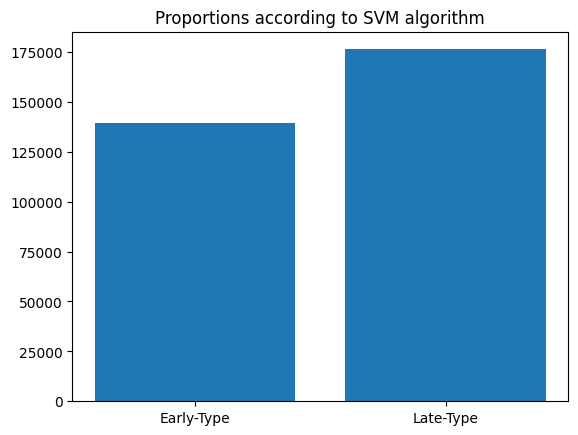

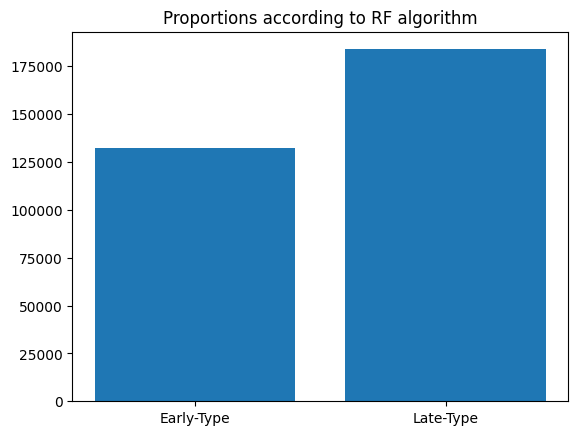

In [3]:
num=len(dat) # Total number of galaxies
num1SVM=len(dat[dat["SVMPython"]==1]) # Number of late-type galaxies according to SVM
num0SVM=len(dat[dat["SVMPython"]==0])
num1RF=len(dat[dat["RFPython"]==1]) # Number of late-type galaxies according to RF
num0RF=len(dat[dat["RFPython"]==0])
numDisagree=len(dat[(dat["SVMPython"]==1)^(dat["RFPython"]==1)]) # Number of galaxies where the two algorithms disagree

print("Number of late-type SVM: ", num1SVM)
print("Number of late-type RF: ", num1RF)
print("Number of early-type SVM: ", num0SVM)
print("Number of early-type RF: ", num0RF)

print("Percent of late-type SVM: ", num1SVM/len(dat))
print("Percent of late-type RF: ", num1RF/len(dat))
print("Percent of early-type SVM: ", num0SVM/len(dat))
print("Percent of early-type RF: ", num0RF/len(dat))

plt.bar(["Early-Type","Late-Type"],[num-num1SVM,num1SVM])
plt.title("Proportions according to SVM algorithm")
plt.show()
plt.bar(["Early-Type","Late-Type"],[num-num1RF,num1RF])
plt.title("Proportions according to RF algorithm")
plt.show()

## 3. Establishing Prior Parameters and Creating Model
Our data follows a binomial distribution, with probability of success theta. Theta can be modeled using a beta distribution, with hyperparameters a and b.

In [4]:
a = 1
b = 1

## 4. Prior Predictive Check

In [5]:
import seaborn as sns

C:\Users\wally\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\wally\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wally\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

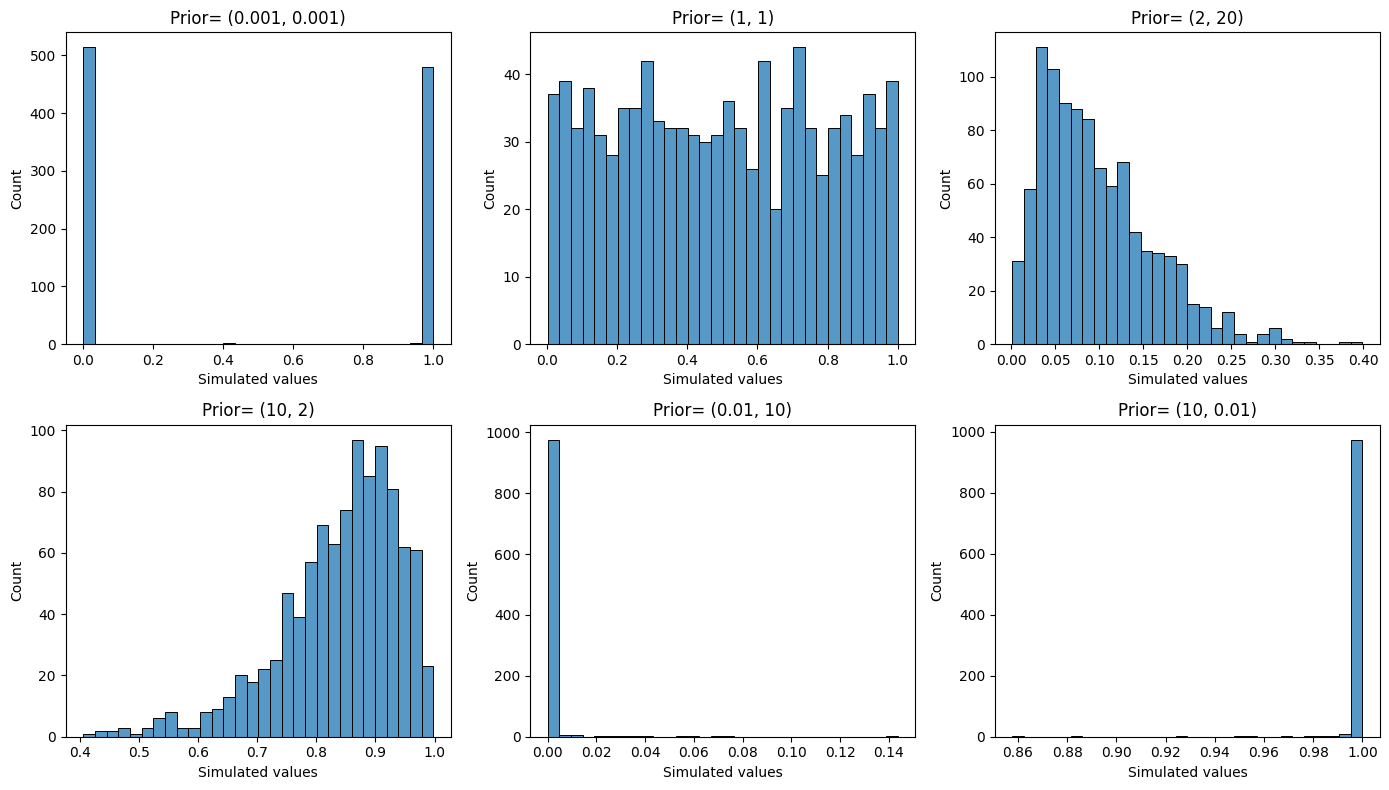

In [6]:
## Prior Predictive Check
ab = [(0.001,0.001), (1,1), (2,20), (10,2), (.01,10), (10,.01)] # The different priors we wish to test
msim = 1000 # Number of simulations for each prior 

# Details about the graph outputs
ncol = 3 
nrow = 2
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(figsize = (14,8),
                        ncols = ncol,
                        nrows = nrow)
for i, (a_test,b_test) in enumerate(ab):
    means = []
    for j in range(msim):
        # Draw from the beta distribution using the priors
        theta = beta.rvs(a_test, b_test, random_state = 5731+j)
        # Draw from the binomial using the results of the beta distribution
        p = theta
        n= 1
        prior_pred_dat = binom.rvs(n, p, size=num, random_state = 5731+j)
        # Get a summary statistic of the binomial distribution (in this case the mean)
        means.append(prior_pred_dat.mean()) 
    # Graphing all the means for the a and b prior
    g = sns.histplot(data=means, kde = False, ax = ax[int(i/ncol)%nrow, i%ncol], bins=30)
    ax[int(i/ncol)%nrow, i%ncol].set_title(f'Prior= {a_test, b_test}')
    ax[int(i/ncol)%nrow, i%ncol].set_xlabel(f'Simulated values')

## 5. Posterior Distribution
Calculating posterior parameters and plotting distribution

Mean for a = 1 b = 1 : 0.5581
Variance for a = 1 b = 1 : 7.8e-07
Lower bound: 0.5563  and Upper bound: 0.5598


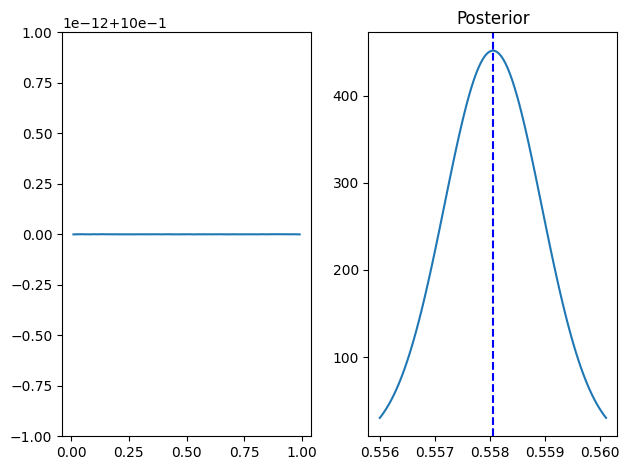

In [7]:
## Parameters
shape_1 = a + num1SVM
shape_2 = num + b - num1SVM
post_mean = shape_1 / (shape_1 + shape_2)
post_variance = (shape_1*shape_2)/((shape_1+shape_2)**2*(shape_1+shape_2+1))
post_lb = beta.ppf(.025, shape_1, shape_2)
post_ub = beta.ppf(.975, shape_1, shape_2)
print('Mean for a =',a,'b =',b,':',round(post_mean,4))
print('Variance for a =',a,'b =',b,':',round(post_variance,9))
print('Lower bound:',round(post_lb,4)," and Upper bound:",round(post_ub,4))

## Plot
ix,ax = plt.subplots(1,2)
plt.title('Posterior')
x1 = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
y = beta.pdf(x1,a,b)
ax[0].plot(x1,y)
xp = np.linspace(beta.ppf(0.01, shape_1, shape_2), beta.ppf(0.99, shape_1, shape_2), 100)
y = beta.pdf(xp, shape_1, shape_2)
ax[1].plot(xp,y)
ax[1].axvline(post_mean,color='b',ls='--')

Posterior Predictive Check

In [8]:
#Posterior Predictive Check


## 6. Sensitivity Analysis
Select different values for a and b and see how much they influence our posterior.

Because of our large sample size, the estimate for the mean is extremely insensitive to the prior hyperparameters. We see that even for a prior that assumes extremely low spiral galaxy frequency (a=0.00001,b=5000), the posterior mean decreases by less than 1%. Similarly, if we presume extremely high spiral galaxy frequency (a=5000,b=0.00001), the posterior mean increases by less than 1%.

Mean for a = 0.1 b = 5 : 0.558
Lower bound: 0.5563  and Upper bound: 0.5598


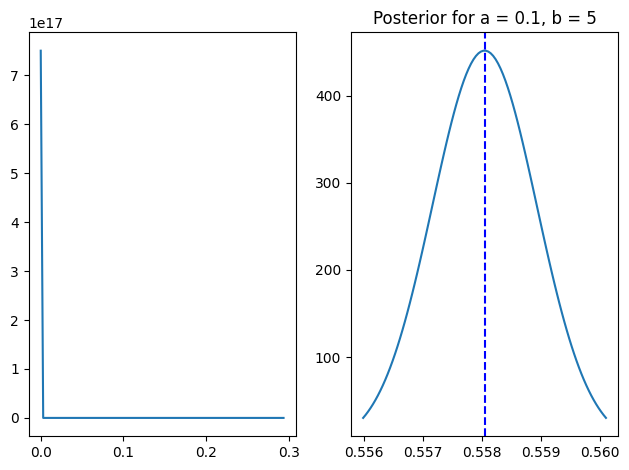

In [9]:
## Sensitivity Analysis
a=0.1
b=5
## Parameters
shape_1 = a + num1SVM
shape_2 = num + b - num1SVM
post_mean = shape_1 / (shape_1 + shape_2)
post_lb = beta.ppf(.025, shape_1, shape_2)
post_ub = beta.ppf(.975, shape_1, shape_2)
print('Mean for a =',a,'b =',b,':',round(post_mean,4))

print('Lower bound:',round(post_lb,4)," and Upper bound:",round(post_ub,4))

## Plot
ix,ax = plt.subplots(1,2)
plt.title('Posterior for a = 0.1, b = 5')
x1 = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
y = beta.pdf(x1,a,b)
ax[0].plot(x1,y)
xp = np.linspace(beta.ppf(0.01, shape_1, shape_2), beta.ppf(0.99, shape_1, shape_2), 100)
y = beta.pdf(xp, shape_1, shape_2)
ax[1].plot(xp,y)
ax[1].axvline(post_mean,color='b',ls='--')


Mean for a = 5 b = 0.1 : 0.5581
Lower bound: 0.5563  and Upper bound: 0.5598


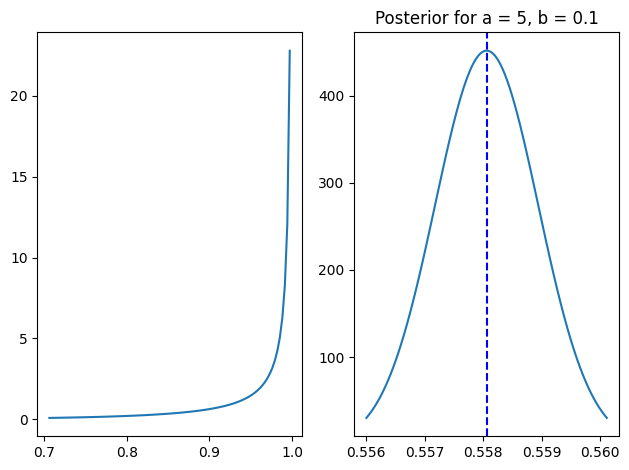

In [10]:
a=5
b=0.1
## Parameters
shape_1 = a + num1SVM
shape_2 = num + b - num1SVM
post_mean = shape_1 / (shape_1 + shape_2)
post_lb = beta.ppf(.025, shape_1, shape_2)
post_ub = beta.ppf(.975, shape_1, shape_2)
print('Mean for a =',a,'b =',b,':',round(post_mean,4))

print('Lower bound:',round(post_lb,4)," and Upper bound:",round(post_ub,4))

## Plot
ix,ax = plt.subplots(1,2)
plt.title('Posterior for a = 5, b = 0.1')
x1 = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
y = beta.pdf(x1,a,b)
ax[0].plot(x1,y)
xp = np.linspace(beta.ppf(0.01, shape_1, shape_2), beta.ppf(0.99, shape_1, shape_2), 100)
y = beta.pdf(xp, shape_1, shape_2)
ax[1].plot(xp,y)
ax[1].axvline(post_mean,color='b',ls='--')

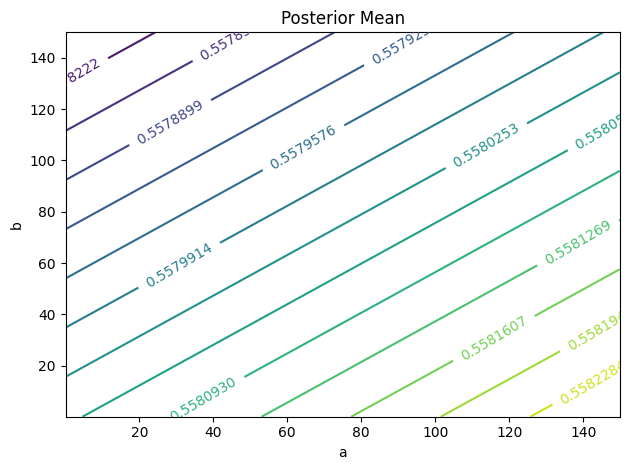

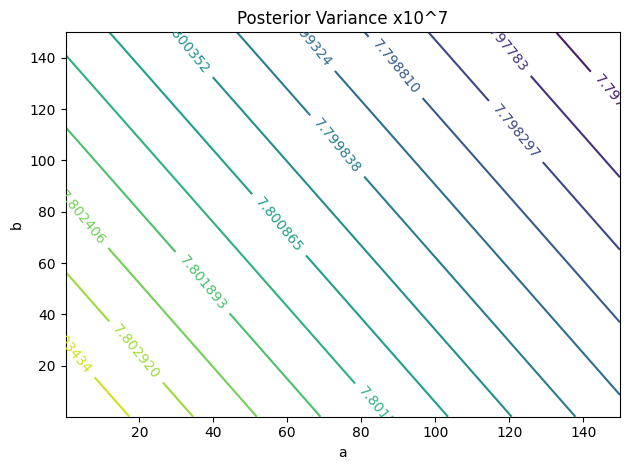

In [11]:
delta=0.05
a = np.arange(0.1, 150, delta)
b = np.arange(0.1, 150, delta)
A, B = np.meshgrid(a, b)
post_mean = (A + num1SVM) / ((A + num1SVM) + (num + B - num1SVM))
post_variance = ((A + num1SVM)*(num + B - num1SVM))/(((A + num1SVM)+(num + B - num1SVM))**2*((A + num1SVM)+(num + B - num1SVM)+1))
fig,ax=plt.subplots()
levels=np.linspace(post_mean.min(),post_mean.max(),15)
h=ax.contour(A,B,post_mean,levels=levels)
ax.clabel(h, inline=1, fontsize=10)
plt.xlabel("a")
plt.ylabel("b")
plt.title("Posterior Mean")
plt.show()
fig,ax=plt.subplots()
levels=np.linspace(post_variance.min(),post_variance.max(),15)
h=ax.contour(A,B,post_variance,levels=levels)
ax.clabel(h, inline=1, fontsize=10)
plt.xlabel("a")
plt.ylabel("b")
plt.title("Posterior Variance x10^7")
plt.show()
# The prior barely matters at all!

## 7. Results: Posterior Confidence Interval, Mean, and Variance 

The final 90% posterior confidence interval for theta is (0.5563,0.5598). This can be interpreted as that when performing an experiment to determine the proportion of late-type galaxies has a 90% chance of yielding a value between (0.5563,0.5598).

The mean we determined for the proportion of late-type galaxies is 0.5581, and the variance is 7.8e-7.